In [1]:
import pandas as pd
import os
import ipdb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pymannkendall as mk
import scipy.stats as stats
from math import sqrt
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt


# 0. Countries with  Methane Emission

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_emission_countries(data, column_name, top_n=10):
    """
    Plot a histogram of the top countries with the highest values in the specified column.

    Args:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The column to use for sorting and plotting.
        top_n (int): The number of top countries to display (default is 10).
    """
    # Exclude 'TOTAL' row from the DataFrame
    data = data[data['Country'] != 'TOTAL']
    
    # Sort the DataFrame by the specified column in descending order
    data = data.sort_values(by=column_name, ascending=False)

    # Select the top N countries
    data_top = data.head(top_n)

    # Find the country with the maximum value
    max_country = data_top.iloc[0]['Country']
    colors = ['red' if country == max_country else 'blue' for country in data_top['Country']]
    # Create a histogram
    plt.figure(figsize=(10, 6))
    bars = plt.bar(data_top["Country"], data_top[column_name], color=colors)
    plt.xlabel("Country")
    plt.ylabel(column_name)
    plt.title(f"Top {top_n} Countries by {column_name} Million cubic meters")
    plt.xticks(rotation=45, ha="right")
    
    # Add values at the top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f"{height}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha="center", va="bottom")

    plt.tight_layout()

    # Show the histogram
    plt.show()




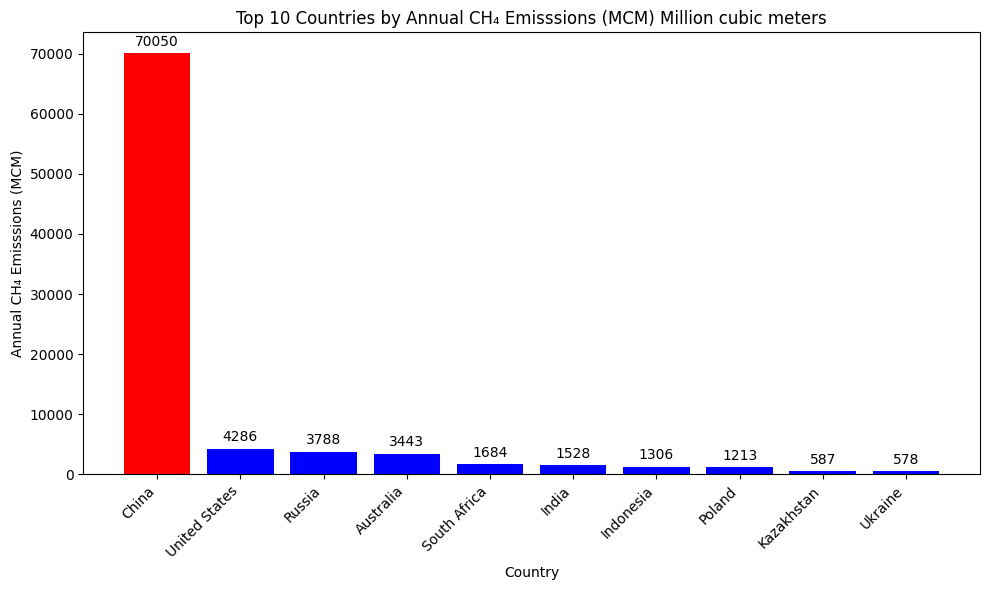

In [7]:
file = './Est/AllCountries_Methane_Emission.xlsx'
methane_emissoindf = pd.read_excel(file, sheet_name='Sheet1')
# Call the function to plot the top countries
plot_top_emission_countries(methane_emissoindf, "Annual CH₄ Emisssions (MCM)", top_n=10)

- Hipocracy is no one talks about china and other developed countries.
- While developing nations struggle to balance emissions reduction and economic growth, developed nations, with greater resources, could do more to lead by example.

## Global Coal Mine Tracker
- We are working on this data provided “Global Coal Mine Tracker, Global Energy Monitor, October 2023 release

    Contains list of world Coal mines, focus on this site, we are using their data
- [To download data, click here](https://globalenergymonitor.org/projects/global-coal-mine-tracker/download-data/)

In [18]:
df = pd.read_excel('./Est/coal-est.xlsx')
print(f' Total coal mines = {df.shape[0]}\nTotal columns = {df.shape[1]}')
df.head(2)

 Total coal mines = 17203
Total columns = 45


,Mine IDs,Mine Name,Mine Name AKAs,Mine Name (Non-ENG),GEM Wiki Page (ENG),GEM Wiki Page (Non-ENG),Status,Status Detail,Project Type,Project Phase,...,Country,Subregion,Region,Latitude,Longitude,Location Accuracy,"Primary Consumer, Destination","Coal Plant, Steel Plant, Terminal","Coal Plant, Steel Plant, Terminal GEM Wiki",Coal Mine Methane Emissions Estimate (MCM/yr)
0,M1526,Dahna Toor Coal Mine,"Dhena Toor, Dahan-e-Tor",NaN,https://www.gem.wiki/Dahna_Toor_Coal_Mine,NaN,Operating,NaN,NaN,NaN,...,Afghanistan,Southern Asia,Asia,35.704992,67.312196,Approximate,NaN,NaN,NaN,6.1
1,M1761,Garmak Project Coal Mine,Western Garmak,NaN,https://www.gem.wiki/Garmak_Project_Coal_Mine,NaN,Operating,NaN,NaN,NaN,...,Afghanistan,Southern Asia,Asia,35.733,67.308,Approximate,NaN,NaN,NaN,0.3


# 1. Separating Africa from all list
- Major focus - Africa Continent
##### Why South Africa

In [65]:
# Assuming 'df' is your DataFrame and 'Subregion' is the column you want to filter
df = pd.read_excel('./Est/coal-Africa.xlsx')
df_region = df[df['Region'].str.contains('AFRICA', case=False)]
print(f' Total African Registered coal mines = {df_region.shape[0]}\nTotal columns = {df_region.shape[1]}')

 Total African Registered coal mines = 760
Total columns = 45


In [47]:
df_africa = df[df['Country'].str.contains('AFRICA', case=False)]
print(f' Total South African Registered coal mines = {df_africa.shape[0]}\nTotal columns = {df_africa.shape[1]}')


 Total South African Registered coal mines = 580
Total columns = 45


In [44]:
counts = df['Country'].value_counts()
print('List of African countries with numkber of  registered coal mines')
counts.to_frame().T

List of African countries with numkber of  registered coal mines


,South Africa,Zimbabwe,Mozambique,Botswana,Nigeria,Ethiopia,Eswatini,Malawi,Niger,Tanzania,Zambia,Egypt,Madagascar
Country,580,40,36,24,20,12,8,8,8,8,8,4,4


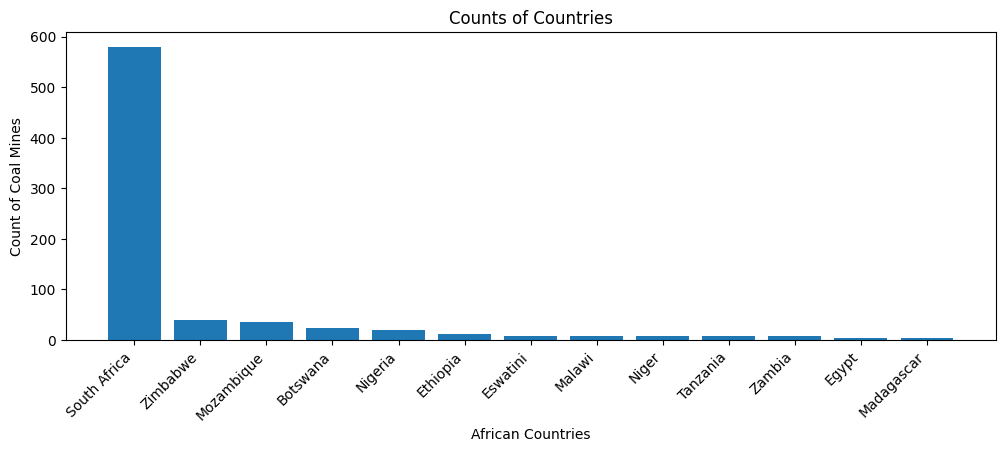

In [63]:
# Data
def showAfricanCountriesPlot():
    countries = ["South Africa", "Zimbabwe", "Mozambique", "Botswana", "Nigeria", "Ethiopia", "Eswatini", "Malawi", "Niger", "Tanzania", "Zambia", "Egypt", "Madagascar"]
    counts = [580, 40, 36, 24, 20, 12, 8, 8, 8, 8, 8, 4, 4]

    # Create a bar graph
    plt.figure(figsize=(12, 4))
    plt.bar(countries, counts)
    plt.xlabel("African Countries")
    plt.ylabel("Count of Coal Mines")
    plt.title("Counts of Countries")
    plt.xticks(rotation=45, ha="right")

    # Show the bar graph
    plt.show()
showAfricanCountriesPlot()


## 2. Major focus on South Africa

- Removing useless columns

In [48]:
df_africa.columns

Index(['Mine IDs', 'Mine Name', 'Mine Name AKAs', 'Mine Name (Non-ENG)',
       'GEM Wiki Page (ENG)', 'GEM Wiki Page (Non-ENG)', 'Status',
       'Status Detail', 'Project Type', 'Project Phase', 'Operators', 'Owners',
       'Parent Company', 'Company HQs', 'Production or Capacity Data (Mtpa)',
       'Coal Output (Annual, Mt)', 'Coal Output (Annual, Mst)', 'Mine Type',
       'Mining Method', 'Mine Size (Km2)', 'Mine Depth (m)', 'Depth Accuracy',
       'Workforce Size', 'Workforce Accuracy', 'Coal Type', 'Coal Grade',
       'Total Reserves (Proven and Probable)',
       'Total Resource (Inferred, Indicated, Measured)',
       'Reserve to Production Ratio (R/P)', 'Opening Year',
       'Reported Life of Mine', 'Unnamed: 31', 'Location',
       'Prefecture, District', 'State, Province', 'Country', 'Subregion',
       'Region', 'Latitude', 'Longitude', 'Location Accuracy',
       'Primary Consumer, Destination', 'Coal Plant, Steel Plant, Terminal',
       'Coal Plant, Steel Plant, Te

In [ ]:
# Assuming 'df' is your DataFrame

# List of column names to be removed
columns_to_remove =['Mine IDs', 'Mine Name AKAs', 'Mine Name (Non-ENG)', 'Status Detail', 'GEM Wiki Page (ENG)', 'GEM Wiki Page (Non-ENG)',  'Project Type', 'Project Phase',
                    'Operators', 'Owners','Parent Company', 'Company HQs', 'Coal Output (Annual, Mst)','Mining Method', 'Depth Accuracy', 'Workforce Accuracy',
                    'Coal Grade', 'Total Reserves (Proven and Probable)', 'Total Resource (Inferred, Indicated, Measured)',
                    'Reported Life of Mine', 'Unnamed: 31', 'Location','Prefecture, District', 'State, Province', 'Region', 'Subregion',
                    'Location Accuracy','Primary Consumer, Destination', 'Coal Plant, Steel Plant, Terminal',
                    'Coal Plant, Steel Plant, Terminal GEM Wiki','Mine Size (Km2)','Reserve to Production Ratio (R/P)','Production or Capacity Data (Mtpa)',
                    'Mine Type', 'Workforce Size', ]

# Remove the specified columns
df_africa = df_africa.drop(columns=columns_to_remove)
df_africa.to_excel('./Est/filtered-coal-Africa.xlsx', index=False)


In [66]:
print(f' Total South African Registered coal mines = {df_africa.shape[0]}\nTotal columns = {df_africa.shape[1]}')
df_africa.head(2)

 Total South African Registered coal mines = 580
Total columns = 10


,Mine Name,Status,"Coal Output (Annual, Mt)",Mine Depth (m),Coal Type,Opening Year,Country,Latitude,Longitude,Coal Mine Methane Emissions Estimate (MCM/yr)
31,Alexander Coal Project,Proposed,8,80,Bituminous,2025,South Africa,-26.312146,29.352647,56.3
32,Argent Colliery,Shelved,1.2,80,Subbituminous,NaN,South Africa,-25.983330,29.433330,2.2


In [67]:
countstatus = df_africa['Status'].value_counts()
countstatus.to_frame().T

,Operating,Proposed,Mothballed,Shelved,Closed,Cancelled
Status,312,144,60,28,24,12


## 3. Going with coalmines whose status is Operating and a known Opening year

- Removing all those whose opening year is TBD

In [83]:
df = pd.read_excel('./Est/filtered-coal-Africa.xlsx')
df = df[df['Status'].str.contains('Operating', case=False)]
df = df.dropna(subset=['Opening Year'])
df_operating = df[df['Opening Year'] != 'TBD']
#REMOVING THOSE ROWS WHICH HAVE 'TBD' IN THE OPENING YEAR COLUMN
print(f'Total South African Registered coal mines with Status is operating and a known Opening Year = {df.shape[0]}\nTotal columns = {df.shape[1]}')

Total South African Registered coal mines with Status is operating and a known Opening Year = 212
Total columns = 10


# 4. Map shown to locate the Coal mines

In [136]:
import folium
import pandas as pd


def showMap(df_operating):
    # Create the map as before
    m = folium.Map(location=[10, 15], zoom_start=3)

    south_africa_geo = {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [
                        [
                         [21.002324, -34.821182],
                        [32.882409, -34.821182],
                        [32.882409, -22.137945],
                        [21.002324, -22.137945],
                        [21.002324, -34.821182],
                        ]
                    ]
                }
            }
        ]
    }
    def style_function(feature):
        return {
            'fillColor': 'yellow',  # Change the fill color to blue
            'color': 'black',     # Outline color
            'weight': 2,          # Outline weight
            'fillOpacity': 0.3    # Fill opacity
        }
    
    folium.GeoJson(
        south_africa_geo,
        name='South Africa',
        style_function=style_function
    ).add_to(m)
    # Add markers for each mine
    for index, row in df_operating.iterrows():
        # Check if the value can be converted to an integer
        try:
            emissions_estimate = int(row['Coal Mine Methane Emissions Estimate (MCM/yr)'])
        except (ValueError, TypeError):
            emissions_estimate = 10  # Set to 0 if conversion fails
        
        # Determine the marker color based on emissions
        if emissions_estimate >= 80:
            marker_color = 'red'
        elif emissions_estimate >= 50:
            marker_color = 'orange'
        else:
            marker_color = 'blue'  # Use blue for other mines
        
        # Create a tooltip text that includes the emissions value
        tooltip_text = f"{row['Mine Name']} - Emissions: {emissions_estimate} MCM/yr"
        
        # Create a marker with the determined color and tooltip
        marker = folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            tooltip=tooltip_text,
            icon=folium.Icon(color=marker_color)
        )
        
        # Add the marker to the map
        marker.add_to(m)

    # Display the map directly in the notebook
    display(m)

# Call the function to display the map
print('Red ones are the mines with high Methane emissions, \nOrange ones are the mines with medium Methane emissions, \nBlue ones are the mines with low Methane emissions')
showMap(df_operating)


Red ones are the mines with high Methane emissions, 
Orange ones are the mines with medium Methane emissions, 
Blue ones are the mines with low Methane emissions


# 5. Mines opened in South africa

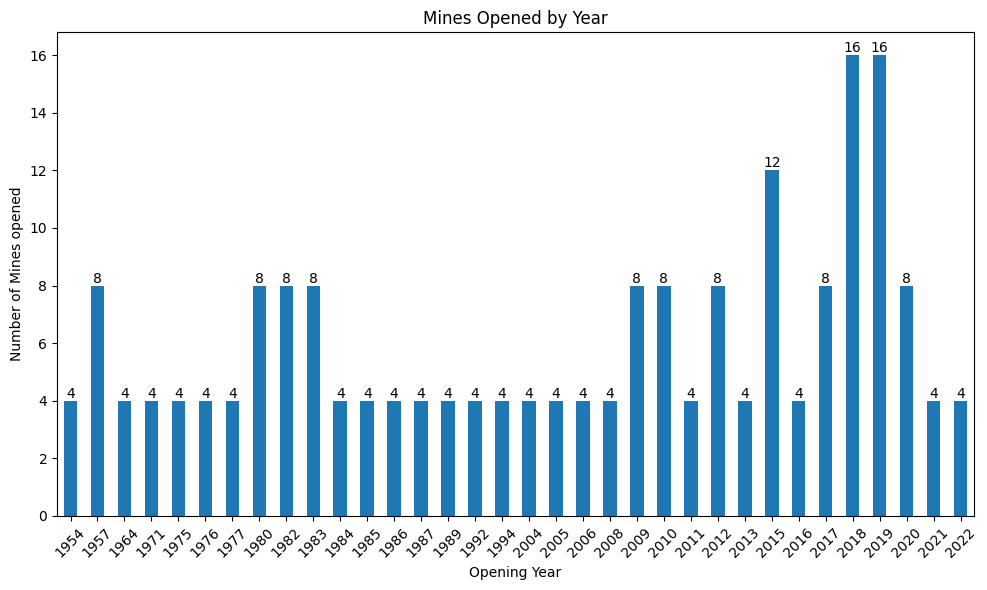

In [140]:
# Convert the 'Opening Year' column to integers
# Count the number of mines opened in each year
mine_counts = df_operating['Opening Year'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
ax = mine_counts.plot(kind='bar', xlabel='Opening Year', ylabel='Number of Mines opened', title='Mines Opened by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add values on top of the bars
for i, v in enumerate(mine_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [138]:
df_operating.to_excel('./Est/filtered-coal-Africa-operating.xlsx', index=False)

In [139]:
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')
df_operating.head(2)

,Mine Name,Status,"Coal Output (Annual, Mt)",Mine Depth (m),Coal Type,Opening Year,Country,Latitude,Longitude,Coal Mine Methane Emissions Estimate (MCM/yr)
0,Arnot Coal Mine,Operating,*,80,Bituminous,1971,South Africa,-25.934846,29.774760,NaN
1,Belfast Coal Mine,Operating,2.7,50,Subbituminous,2020,South Africa,-25.834028,29.987778,3.2


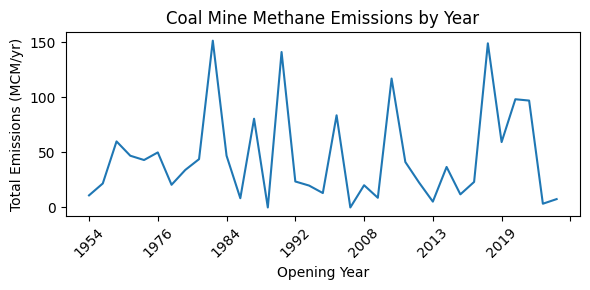

In [147]:
df['Coal Mine Methane Emissions Estimate (MCM/yr)'] = pd.to_numeric(df_operating['Coal Mine Methane Emissions Estimate (MCM/yr)'], errors='coerce')

# Group and accumulate emissions by year
emissions_by_years = df.groupby('Opening Year')['Coal Mine Methane Emissions Estimate (MCM/yr)'].sum()

# Create a line graph
plt.figure(figsize=(6, 3))
emissions_by_years.plot(kind='line', xlabel='Opening Year', ylabel='Total Emissions (MCM/yr)', title='Coal Mine Methane Emissions by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [148]:
emissions_by_years = pd.DataFrame({'Year': emissions_by_years.index, 'Methane Emission': emissions_by_years.values})
emissions_by_years.head(4)

,Year,Methane Emission
0,1954,11.0
1,1957,21.8
2,1964,60.0
3,1971,47.0


# 6. Searching for trends 

### a. Emission vs Number of new mines opened over the years

- Find annual emmision by mines opened in same year

In [184]:
def showEmissionVSNewMinesPlot(emissions_by_years, new_mines_opened_byYear):
     # Create DataFrames from the sample data
    df_emissions = pd.DataFrame(emissions_by_years)
    df_mine_count = pd.DataFrame(new_mines_opened_byYear)

    # Combine both DataFrames based on the 'Year' column
    combined_df = df_emissions.merge(df_mine_count, on='Year')

    # Plot a graph
    plt.figure(figsize=(8,4))
    plt.plot(combined_df['Year'], combined_df['Methane Emission'], marker='o', label='Methane Emission')
    plt.plot(combined_df['Year'], combined_df['Num of New Mines Opened'], marker='o', label='Mine Count')
    plt.xticks(combined_df['Year'].unique(), rotation=75)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Emissions vs. Mine Count Over the Years')
    plt.grid(True)
    plt.show()


   Year  Methane Emission
0  1954              33.6
1  1957              25.6
2  1964              56.4
3  1971               0.0
   Year  Num of New Mines Opened
0  1954                        4
1  1957                        8
2  1964                        4
3  1971                        0


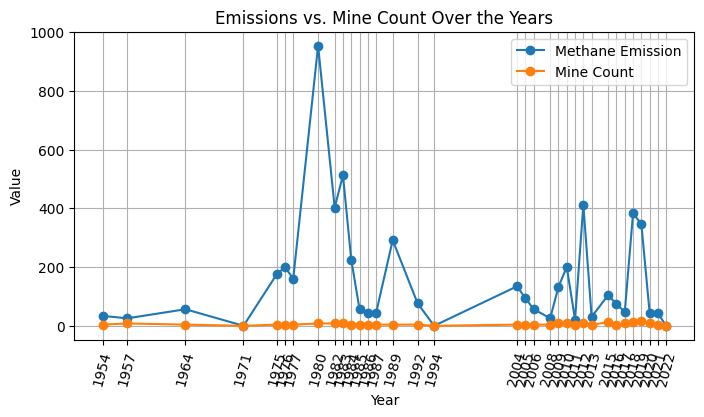

In [186]:
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')  
df_operating['Coal Mine Methane Emissions Estimate (MCM/yr)'] = pd.to_numeric(df_operating['Coal Mine Methane Emissions Estimate (MCM/yr)'], errors='coerce')
df_operating.to_excel('./Est/filtered-coal-Africa-operating.xlsx', index=False)
# Group and accumulate emissions by year
emissions_by_years = df_operating.groupby('Opening Year')['Coal Mine Methane Emissions Estimate (MCM/yr)'].sum()
new_mines_opened_byYear = df_operating.groupby('Opening Year')['Coal Mine Methane Emissions Estimate (MCM/yr)'].count()
emissions_by_years = pd.DataFrame({'Year': emissions_by_years.index, 'Methane Emission': emissions_by_years.values})
new_mines_opened_byYear = pd.DataFrame({'Year': new_mines_opened_byYear.index, 'Num of New Mines Opened': new_mines_opened_byYear.values})
print(emissions_by_years.head(4))
print(new_mines_opened_byYear.head(4))
showEmissionVSNewMinesPlot(emissions_by_years, new_mines_opened_byYear)

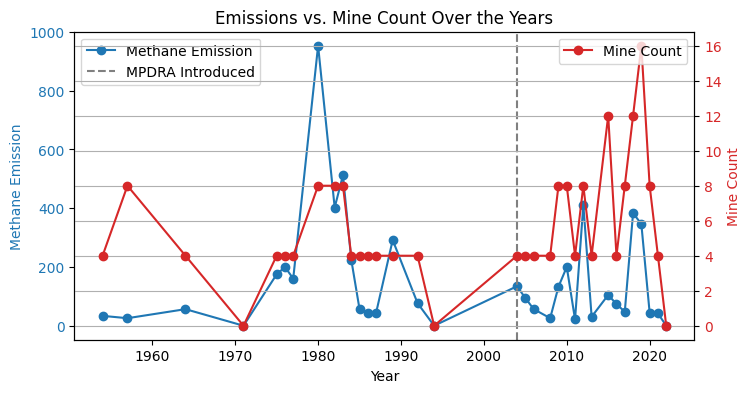

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

def showEmissionVSNewMinesPlot2(emissions_by_years, new_mines_opened_byYear):
    # Create DataFrames from the sample data
    df_emissions = pd.DataFrame(emissions_by_years)
    df_mine_count = pd.DataFrame(new_mines_opened_byYear)

    # Combine both DataFrames based on the 'Year' column
    combined_df = df_emissions.merge(df_mine_count, on='Year')

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Methane Emission on the primary y-axis
    ax1.plot(combined_df['Year'], combined_df['Methane Emission'], marker='o', label='Methane Emission', color='tab:blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Methane Emission', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot Mine Count on the secondary y-axis
    ax2.plot(combined_df['Year'], combined_df['Num of New Mines Opened'], marker='o', label='Mine Count', color='tab:red')
    ax2.set_ylabel('Mine Count', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    # Add a vertical line at year 2004
    ax1.axvline(x=2004, color='gray', linestyle='--', label='MPDRA Introduced')
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Emissions vs. Mine Count Over the Years')
    plt.grid(True)
    plt.show()

# Example usage:
showEmissionVSNewMinesPlot2(emissions_by_years, new_mines_opened_byYear)


#### Result
- (As it is effected by previouly opened mines, show cannot say anything)

### b. Emission vs Coal Output

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

def ShowEmissionvsCoalPlot(emissions_by_years, coal_output_by_year):
    # Create DataFrames from the sample data
    df_emissions = pd.DataFrame(emissions_by_years)
    df_coal_output_by_year = pd.DataFrame(coal_output_by_year)

    # Combine both DataFrames based on the 'Year' column
    combined_df = df_emissions.merge(df_coal_output_by_year, on='Year')

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Plot Methane Emission on the primary y-axis
    ax1.plot(combined_df['Year'], combined_df['Methane Emission'], marker='o', label='Methane Emission', color='tab:blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Methane Emission(MCM)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot Coal Output on the secondary y-axis
    ax2.plot(combined_df['Year'], combined_df['Coal Output (Annual, Mt)'], marker='o', label='Coal Output', color='tab:red')
    ax2.set_ylabel('Coal Output (Annual, Mt)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax1.axvline(x=2004, color='gray', linestyle='--', label='MPDRA Introduced')
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title('Methane Emissions vs. Coal Output (metric Ton)')
    plt.grid(True)
    plt.show()

# Example usage:
# ShowEmissionvsCoalPlot(emissions_by_years, coal_output_by_year)


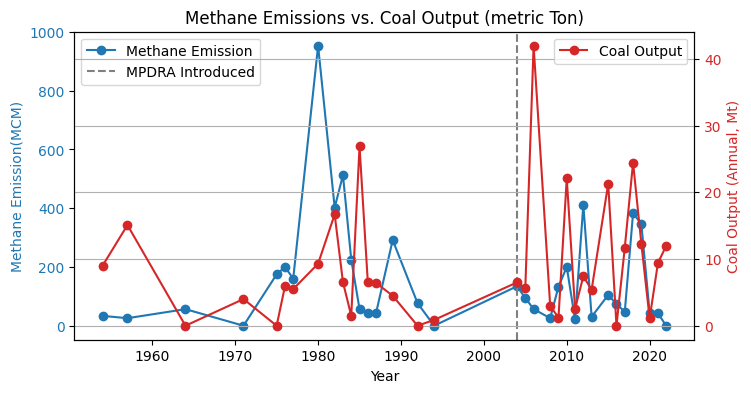

In [209]:
# Convert the 'Opening Year' column to integers
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')  
df_operating['Opening Year'] = pd.to_numeric(df_operating['Opening Year'], errors='coerce')
df_operating['Coal Output (Annual, Mt)'] = pd.to_numeric(df_operating['Coal Output (Annual, Mt)'], errors='coerce')
df_operating.to_excel('./Est/filtered-coal-Africa-operating.xlsx', index=False)
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')

# Group and accumulate emissions by year
coal_output_by_year = df_operating.groupby('Opening Year')['Coal Output (Annual, Mt)'].sum()
coal_output_by_year = pd.DataFrame({'Year': coal_output_by_year.index, 'Coal Output (Annual, Mt)': coal_output_by_year.values})

ShowEmissionvsCoalPlot(emissions_by_years, coal_output_by_year)

### c. Mine depth vs Methane Emission

In [241]:
def ShowMineDepth_vs_MethEmission(data):
    data['Mine Depth (m)'].fillna(0, inplace=True)  # Replace missing depth values with 0

    # Relationship Between Depth and Methane Emissions
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Mine Depth (m)'], data['Coal Mine Methane Emissions Estimate (MCM/yr)'], alpha=0.5)
    plt.xlabel('Mine Depth (m)')
    plt.ylabel('Methane Emissions (MCM/yr)')
    plt.title('Relationship Between Mine Depth and Methane Emissions')
    plt.grid(True)
    # Iterate over the data and add an annotation for each scatter point
    for i, row in data.iterrows():
        # Get the opening year and coal type for the current row
        opening_year = row['Opening Year']
        coal_type = row['Coal Type']

        # Get the x and y coordinates of the current scatter point
        x = row['Mine Depth (m)']
        y = row['Coal Mine Methane Emissions Estimate (MCM/yr)']

        # Add an annotation to the plot
        plt.annotate(f'{opening_year}, {coal_type}', xy=(x, y), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom')
    plt.show()

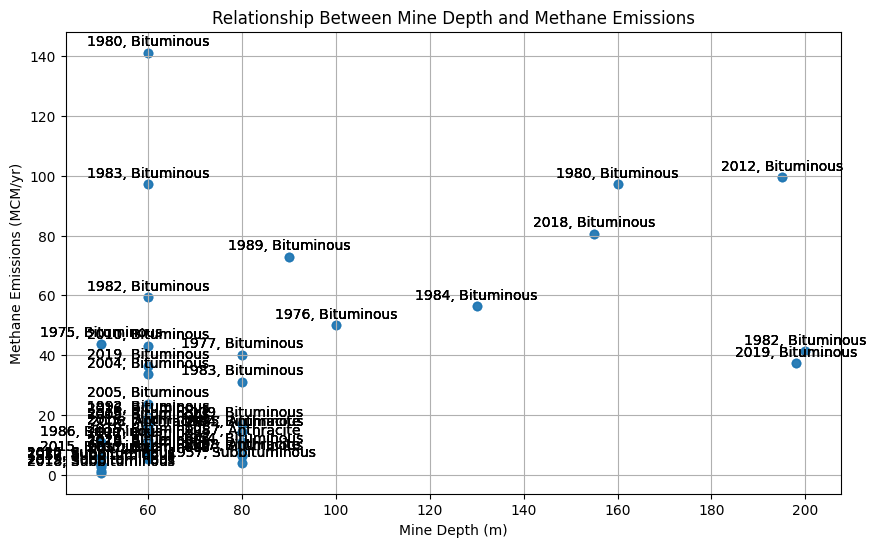

In [242]:
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')  
df_operating['Coal Output (Annual, Mt)'] = pd.to_numeric(df_operating['Coal Output (Annual, Mt)'], errors='coerce')
df_operating['Mine Depth (m)'] = pd.to_numeric(df_operating['Mine Depth (m)'], errors='coerce')


ShowMineDepth_vs_MethEmission(df_operating)

    Bituminous Coal:
        Middle-rank coal with high carbon content.
        Known for significant methane emissions during mining.
        Emissions influenced by factors like coal seam depth and temperature.
        Has a higher potential for methane emissions.

    Subbituminous Coal:
        Contains lower carbon content, fewer impurities.
        Generally, lower potential for methane emissions compared to bituminous coal.

    Anthracite Coal:
        High-rank coal with the highest carbon content.
        Considered the cleanest burning coal.
        Lowest potential for methane emissions among the three types.

- In summary, bituminous coal has a higher potential for methane emissions, while anthracite coal has the lowest potential. Subbituminous coal falls in between. Factors like coal composition and mining conditions affect methane emissions. Methane emissions are a significant concern in the coal industry, and measures are taken to reduce them during mining and production.

### d. Mine depth vs Coal output

In [247]:
def MineDepth_vs_CoalOutput(data):
    # Filter out rows with missing coal output and mine depth values
    data = data.dropna(subset=['Coal Output (Annual, Mt)', 'Mine Depth (m)'])

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    hist = plt.hist2d(data['Mine Depth (m)'], data['Coal Output (Annual, Mt)'], bins=30, cmap='viridis')
    plt.colorbar(label='Frequency')

    plt.xlabel('Mine Depth (m)')
    plt.ylabel('Coal Output (Annual, Mt)')
    plt.title('2D Histogram: Mine Depth vs. Coal Output')

    # Show the plot
    plt.show()



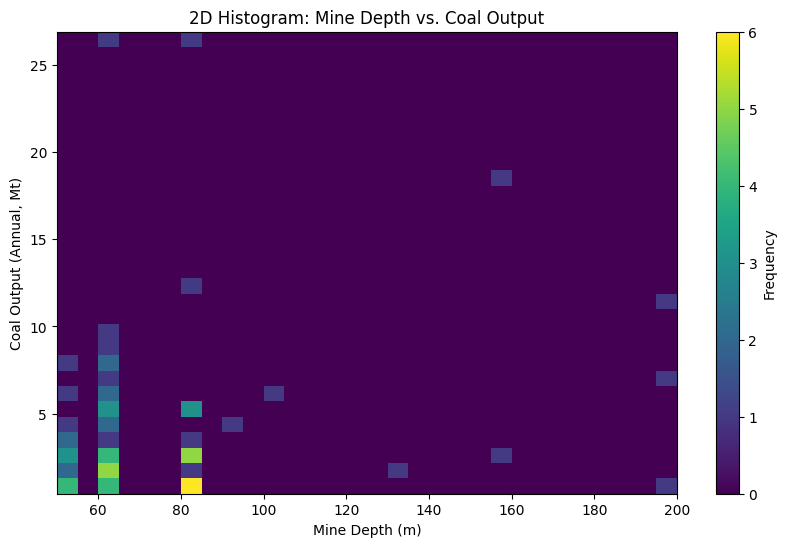

In [248]:
MineDepth_vs_CoalOutput(df_operating)

In [218]:
countstatus = df_operating['Coal Type'].value_counts()
countstatus.to_frame().T

,Bituminous,Subbituminous,Anthracite
Coal Type,156,32,16


# 7. Identify the top 10 coal mines by output.(annually)

In [254]:
def ShowTop10(df):
    # Filter out rows with missing coal output values
    data = df_operating.dropna(subset=['Coal Output (Annual, Mt)'])
    # Sort the DataFrame by coal output in descending order
    data = data.sort_values(by='Coal Output (Annual, Mt)', ascending=False)
    # Select the top 10 coal mines
    top_10_mines = data.head(10)
        # Create a Folium map
    m = folium.Map(location=[0, 0], zoom_start=3)

    # Add markers for the top 10 coal mines
    for index, row in top_10_mines.iterrows():
        try:
            emissions_estimate = int(row['Coal Mine Methane Emissions Estimate (MCM/yr)'])
        except (ValueError, TypeError):
            emissions_estimate = 0  # Set to 0 if conversion fails
        if emissions_estimate >= 100:
            marker_color = 'red'
        else:
            marker_color = 'blue'   
        tooltip_text = f"Name: {row['Mine Name']}<br>Coal Output(Annual, Mt): {row['Coal Output (Annual, Mt)']} <br>Year: {row['Opening Year']}<br>Methane Emissions (MCM/yr): {row['Coal Mine Methane Emissions Estimate (MCM/yr)']}"
        tooltip_text += f':\nCoal Type: {row["Coal Type"]}'
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            tooltip=tooltip_text,
            icon=folium.Icon(color=marker_color)
        ).add_to(m)
    display(m)



In [255]:
df_operating = pd.read_excel('./Est/filtered-coal-Africa-operating.xlsx')
ShowTop10(df_operating)


#### Obsevations
- The Grootegeluk coal mine is an open-pit coal mine located in Limpopo Province, South Africa. It is owned and operated by Exxaro Resources, one of the largest coal producers in South Africa.
- The mine has been in operation since 1980 and produces about 26 million tonnes of coal per year. 
- Environmental impact: Major source of methane emissions
- Future: Could close by 2050

Climatic Impact comparision with Europe and Africa

In [222]:
FILE = './Est/Global-Coal-Mine-Tracker-October-2023.xlsx'
excel_file = openpyxl.load_workbook(FILE)
sheet_names = excel_file.sheetnames
sheet_names
second_sheet = excel_file['Global Coal Mine Tracker']

data = []
# Create an empty list to store the rows of data
for row in second_sheet.iter_rows(values_only=True):
    data.append(row)

# Convert the data list to a Pandas DataFrame
df = pd.DataFrame(data)

# Remove the top row which contains cell references
df.columns = df.iloc[0]
df = df[1:]

# ve the data from the second sheet in the 'df' DataFrame without cell references
df.to_excel('./Est/coal-est-new.xlsx', index=False)

In [7]:
file = './Est/CO2-by-source.csv'
df  = pd.read_csv(file)
df

,Entity,Code,Year,Annual CO₂ emissions from other industry,Annual CO₂ emissions from flaring,Annual CO₂ emissions from cement,Annual CO₂ emissions from gas,Annual CO₂ emissions from oil,Annual CO₂ emissions from coal
0,Afghanistan,AFG,1949,NaN,0.0,0.0,0.0,0.000,14656.000
1,Afghanistan,AFG,1950,NaN,0.0,0.0,0.0,63203.996,21068.000
2,Afghanistan,AFG,1951,NaN,0.0,0.0,0.0,65952.000,25648.000
3,Afghanistan,AFG,1952,NaN,0.0,0.0,0.0,59892.000,31707.998
4,Afghanistan,AFG,1953,NaN,0.0,0.0,0.0,68307.000,37949.000
...,...,...,...,...,...,...,...,...,...
29452,Zimbabwe,ZWE,2017,NaN,0.0,468867.0,0.0,3226752.000,5900452.000
29453,Zimbabwe,ZWE,2018,NaN,0.0,557990.0,0.0,4059712.000,7177776.000
29454,Zimbabwe,ZWE,2019,NaN,0.0,569615.0,0.0,3656672.000,6888320.000
29455,Zimbabwe,ZWE,2020,NaN,0.0,569615.0,0.0,3316712.000,6721571.000


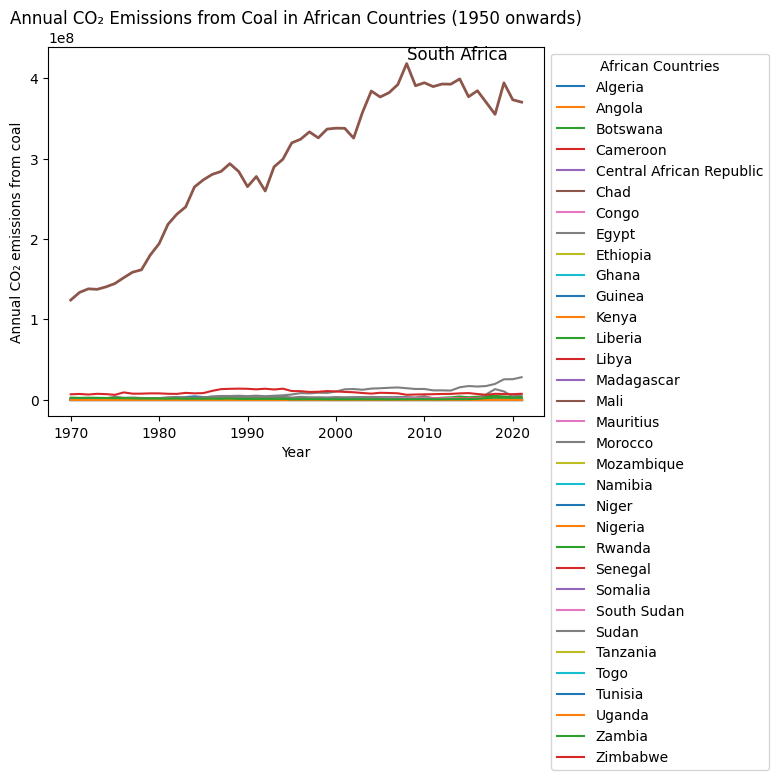

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file = './Est/CO2-by-source.csv'
df = pd.read_csv(file)

# List of African countries
african_countries = [
    "Algeria", "Angola", "Botswana", "Cameroon", "Central African Republic", "Chad", "Congo",
    "Egypt", "Ethiopia", "Ghana", "Guinea", "Kenya", "Liberia",
    "Libya", "Madagascar", "Mali", "Mauritius", "Morocco", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Senegal",
    "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia",
    "Zimbabwe"
]

# Filter data for the selected African countries and years from 1950 onwards
filtered_data = df[(df['Entity'].isin(african_countries)) & (df['Year'] >= 1970)]

# Group and sum the CO₂ emissions by year for each country
grouped_data = filtered_data.groupby(['Entity', 'Year'])['Annual CO₂ emissions from coal'].sum().unstack()

# Create a line plot for each country
for country in african_countries:
    if country == "South Africa" or country == "India" or country == "Africa":
        plt.plot(grouped_data.loc[country], label=None, linewidth=2)  # No label for South Africa
        # Adding a label for South Africa near the data point
        plt.text(grouped_data.loc[country].idxmax(), grouped_data.loc[country].max(), country, fontsize=12, ha='left', va='bottom')
    else:
        plt.plot(grouped_data.loc[country], label=country)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions from coal')
plt.title('Annual CO₂ Emissions from Coal in African Countries (1950 onwards)')



# Add a legend to distinguish the countries
plt.legend(title='African Countries', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.show()


In [ ]:
'''Writing about the carbon emission using the data of electricity generation from coal in Africa, the
highest carbon emission from coal is from South Africa, followed by Egypt, Nigeria, and Morocco. The

My main aim is to showcase how much coal is produced continent wise  and how much is it used in gerating 
electricity and how much carbon emission is used in internet consuming devices.
We are currently reading the research papers and find corelatin . As coal is non renewable source of energy
and now we have to prodeced less energy consume devices . Develeoping countries usin old medical devices and machines
and they are using a huge amount of energy . We have to develop energy efficient devices and machines at cheaper rates
so the developing countries can afford it

Now the mainaim is to find corealtino how much a aergae personis using the eletrricity as industrializatio is at high peak.
So may apps are there in market wih target the user to consume more internet and engage rather than playing outdoor.
Its going to be difficilut as very less surveys are happedn and we will use different factores to find the corelation